<a href="https://colab.research.google.com/github/marcelodepaoli/21_ANNs/blob/main/01_Regress%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de regressão com Keras

Vamos agora aplicar nosso conhecimento a um conjunto de dados mais realista.

## Os dados

Utilizaremos um conjunto de dados do Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Colunas de características (features)
    
* id - ID único para cada casa vendida
* date - Data da venda da casa
* price - Preço de cada casa vendida
* bedrooms - Número de quartos
* bathrooms - Número de banheiros, onde 0.5 corresponde a um quarto com banheiro, mas sem chuveiro
* sqft_living - Metragem quadrada do espaço interior dos apartamentos
* sqft_lot - Metragem quadrada do espaço
* floors - Número de pisos
* waterfront - Uma variável fictícia (dummy variable) para saber se o apartamento tinha vista para o mar ou não
* view - Um índice de 0 a 4 de quão boa era a vista do imóvel
* condition - Um índice de 1 a 5 sobre o estado do apartamento
* grade - Um índice de 1 a 13, onde 1-3 fica aquém da construção e design de edifícios, 7 tem um nível médio de construção e design e 11-13 tem um alto nível de qualidade de construção e design.
* sqft_above - A metragem quadrada do espaço interior da habitação que está acima do nível do solo
* sqft_basement - A metragem quadrada do espaço interno da habitação que está abaixo do nível do solo
* yr_built - O ano em que a casa foi inicialmente construída
* yr_renovated - O ano da última reforma da casa
* zipcode - Em que área do código postal a casa está
* lat - Latitude
* long - Longitude
* sqft_living15 - A metragem quadrada do espaço interno da habitação para os 15 vizinhos mais próximos
* sqft_lot15 - A metragem quadrada dos terrenos dos 15 vizinhos mais próximos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/IA/21_ANNs")
os.listdir()

In [ ]:
df = pd.read_csv('DATA/kc_house_data.csv')

# Análise exploratória de dados

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().transpose()

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df['price'])

In [ ]:
sns.countplot(x=df['bedrooms'])

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Propriedades Geográficas

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20)

In [ ]:
len(df)*(0.01)

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Outras características

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

## Trabalhando com os dados das características

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df.head()

### Feature Engineering from Date

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['month'] = df['date'].apply(lambda date:date.month)

In [ ]:
df['year'] = df['date'].apply(lambda date:date.year)

In [ ]:
sns.boxplot(x='year',y='price',data=df)

In [ ]:
sns.boxplot(x='month',y='price',data=df)

In [ ]:
df.groupby('month').mean()['price'].plot()

In [ ]:
df.groupby('year').mean(numeric_only=True)['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df.columns

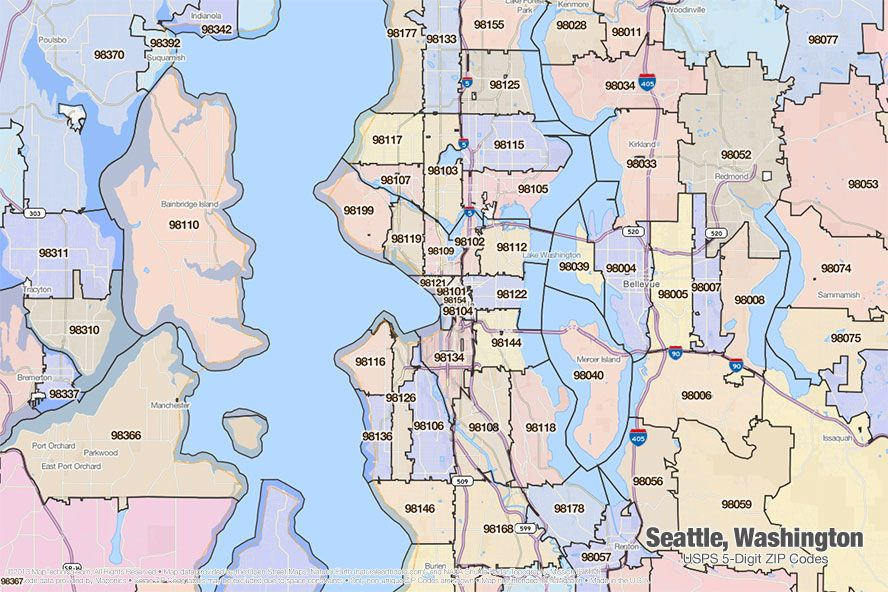

In [ ]:
# Pode valer a pena considerar remover isso
df['zipcode'].value_counts()

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df.head()

In [ ]:
df['yr_renovated'].value_counts()

In [ ]:
df['sqft_basement'].value_counts()

## Normalização e train/test split

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Normalizando

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Criando um modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

# Avaliação nos dados de teste

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Prevendo em dados novos

In [ ]:
X_test

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
explained_variance_score(y_test,predictions)

In [ ]:
df['price'].mean()

In [ ]:
df['price'].median()

In [ ]:
# Nossas previsões
plt.scatter(y_test,predictions)

# Previsões perfeitas
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.values.reshape(6480, 1) - predictions

In [ ]:
sns.displot(errors)

### Prevendo em uma casa nova

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [ ]:
single_house

In [ ]:
model.predict(single_house)

In [ ]:
df.iloc[0]